In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import time
import pickle
import numpy as np

In [17]:
model_file = "../../models/RandomForest_3"
data_file = "../../data/processed_data_2.csv"

In [18]:
data = pd.read_csv(data_file)

for column in data:
    if column in ["bhk","status","house_type","new"]:
        # Get the value counts for the column
        value_counts = data[column].value_counts()
        # Find the values that occur fewer than 10 times
        to_drop = value_counts[value_counts < 10].index
        # Drop rows where the column's value is in the to_drop list
        data = data[~data[column].isin(to_drop)]
for column in data:
    if column in ["bhk","status","house_type","new"]:
        print("Column Name: ", column)
        print(data[column].unique())
        print(data[column].value_counts())

Column Name:  bhk
[2 1 3 4 5 6]
bhk
2    20154
1    16596
3     7278
4     1103
5      162
6       39
Name: count, dtype: int64
Column Name:  status
[1 0]
status
0    26904
1    18428
Name: count, dtype: int64
Column Name:  house_type
[0 2 1 3]
house_type
0    44580
2      597
3      110
1       45
Name: count, dtype: int64
Column Name:  new
[0 1]
new
1    27140
0    18192
Name: count, dtype: int64


In [19]:
def preprocessing(data:pd.DataFrame) -> pd.DataFrame:
    # data.drop(["status","new","house_type"], axis = 1, inplace = True)
    data = data.dropna()
    return data

In [20]:
processed_data = preprocessing(data)
for column in processed_data:
    print(column)

bhk
area
status
price_in_USD
house_type
new
region_Agripada
region_Airoli
region_Ambernath East
region_Ambernath West
region_Andheri East
region_Andheri West
region_Anjurdive
region_Badlapur East
region_Badlapur West
region_Bandra East
region_Bandra Kurla Complex
region_Bandra West
region_Belapur
region_Bhandup East
region_Bhandup West
region_Bhayandar East
region_Bhayandar West
region_Bhiwandi
region_Boisar
region_Borivali East
region_Borivali West
region_Byculla
region_Chembur
region_Colaba
region_Dadar East
region_Dadar West
region_Dahisar
region_Deonar
region_Diva
region_Dombivali
region_Dronagiri
region_Ghansoli
region_Ghatkopar East
region_Ghatkopar West
region_Girgaon
region_Goregaon East
region_Goregaon West
region_Jogeshwari East
region_Jogeshwari West
region_Juhu
region_Juinagar
region_Kalamboli
region_Kalwa
region_Kalyan East
region_Kalyan West
region_Kamothe
region_Kandivali East
region_Kandivali West
region_Kanjurmarg
region_Karanjade
region_Karjat
region_Kasheli
region_Kh

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = processed_data.drop(labels="price_in_USD",axis=1)
for column in X:
    if column in ["locality","region", "status", "age","type"]:
        X[column] = le.fit_transform(X[column])

Y = processed_data["price_in_USD"]
print(X.shape)
print(Y.shape)

(45332, 114)
(45332,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(50, 110, 5),'max_features': [None, 'sqrt','log2']}
def hypersearch(model, model_name, param_grid, X_train, Y_train, scoring='r2'):
    # Hyperparameter tuning
    rs = GridSearchCV(model, param_grid, cv=4,n_jobs=-1, scoring=scoring, return_train_score=True)
    rs.fit(X_train, Y_train)
    best_model = rs.best_estimator_

    #add the report about best hyperparameter of the model to dataframe
    result = pd.DataFrame(rs.cv_results_)
    result.sort_values('rank_test_score', inplace=True)
    result = result[['params', 'mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score']]
    display(result)
    
    pickle.dump(best_model, open(model_name, 'wb'))
    return best_model

model = hypersearch(RandomForestRegressor(random_state=42), model_file, param_grid, X, Y)

,params,mean_fit_time,mean_score_time,mean_test_score,mean_train_score
17,"{'max_depth': 75, 'max_features': 'log2'}",10.008932,0.434499,0.605058,0.988311
20,"{'max_depth': 80, 'max_features': 'log2'}",10.971579,0.476620,0.601500,0.988416
29,"{'max_depth': 95, 'max_features': 'log2'}",11.595601,0.509051,0.598900,0.988528
23,"{'max_depth': 85, 'max_features': 'log2'}",11.510944,0.508289,0.597185,0.988418
35,"{'max_depth': 105, 'max_features': 'log2'}",10.190397,0.484685,0.597166,0.988506
32,"{'max_depth': 100, 'max_features': 'log2'}",10.154457,0.416707,0.597145,0.988525
11,"{'max_depth': 65, 'max_features': 'log2'}",9.795299,0.395454,0.596897,0.987477
10,"{'max_depth': 65, 'max_features': 'sqrt'}",11.442310,0.374003,0.596447,0.987923
0,"{'max_depth': 50, 'max_features': None}",61.622981,0.342035,0.596118,0.986103
25,"{'max_depth': 90, 'max_features': 'sqrt'}",12.319884,0.430727,0.596035,0.988418


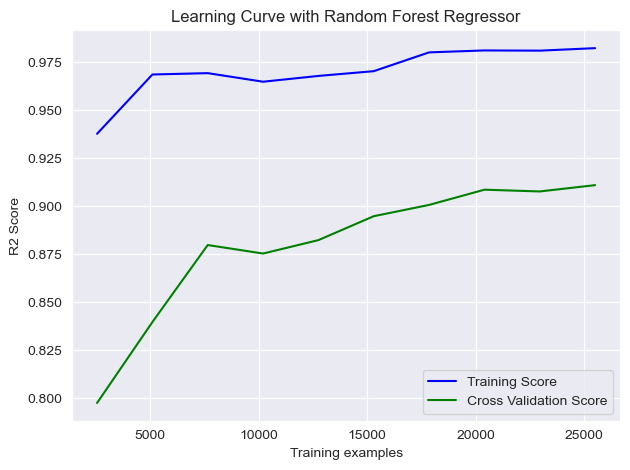

In [24]:
from sklearn.model_selection import learning_curve

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_sizes, train_score, val_score = learning_curve(RandomForestRegressor(n_estimators=10,max_depth=75,max_features='log2', random_state=42), X_train, Y_train,
                                          cv=4, train_sizes=np.linspace(0.1, 1.0, 10),scoring="r2")

train_score_mean = np.mean(train_score, axis=1)
train_score_std = np.std(train_score, axis=1)

val_score_mean = np.mean(val_score, axis=1)
val_score_std = np.std(val_score, axis=1)

plt.plot(train_sizes, train_score_mean,
         label="Training Score", color='b')
plt.plot(train_sizes, val_score_mean,
         label="Cross Validation Score", color='g')
# Creating the plot
plt.title("Learning Curve with Random Forest Regressor")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [25]:
# start = time.time()
# # Create the model
# model = RandomForestRegressor(n_estimators=10, max_depth=110 , random_state=42)
# print("Start training...")
# model.fit(X_train, Y_train)
# end = time.time()
# print("Time execution : ", end - start)
# pickle.dump(model, open(model_name, 'wb'))

In [26]:
loaded_model = pickle.load(open(model_file, 'rb'))

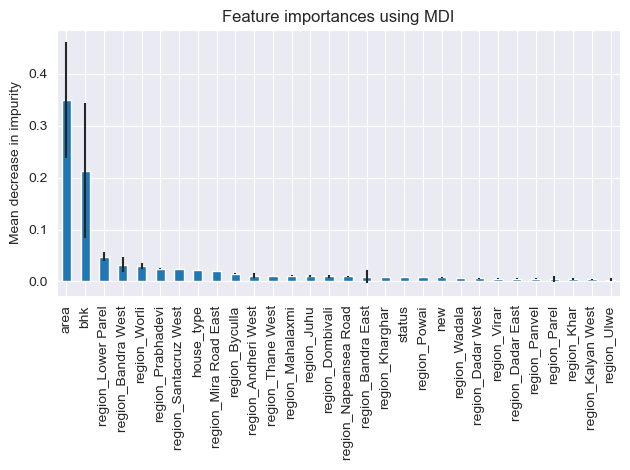

In [27]:
feature_names = [f"{column}" for column in X_train]
importances = loaded_model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in loaded_model.estimators_], axis=0)
sorted_importances = forest_importances.sort_values(ascending=False)[:30]
fig, ax = plt.subplots()
sorted_importances.plot.bar(yerr=std[:30], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [28]:
#Make the predictions 
Y_pred = loaded_model.predict(X_test)
pred_table = pd.DataFrame(data={"actual value":Y_test, "predicted":loaded_model.predict(X_test)})
pred_table["difference"] = pred_table["actual value"] - pred_table["predicted"]
pred_table

,actual value,predicted,difference
14948,92400.0,92259.928608,140.071392
19778,120000.0,119805.324619,194.675381
27087,45600.0,45973.208047,-373.208047
14980,114000.0,115450.299226,-1450.299226
32008,226800.0,222984.000000,3816.000000
...,...,...,...
16471,145200.0,146036.310597,-836.310597
28095,78000.0,73080.844635,4919.155365
44684,49140.0,57566.277826,-8426.277826
11293,186000.0,159070.813396,26929.186604


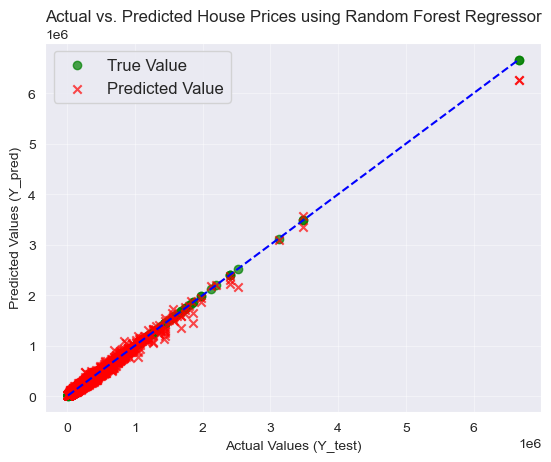

In [29]:
# Assuming you have obtained Y_pred and Y_test from your model

# Create a scatter plot or line plot
# Scatter plot for Y_test (green)
plt.scatter(Y_test, Y_test, c='green', marker='o', label='True Value', alpha=0.7)

# Scatter plot for Y_pred (red)
plt.scatter(Y_test, Y_pred, c='red', marker='x', label='Predicted Value', alpha=0.7)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'b--')  # Diagonal line for reference
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.legend(fontsize=12)
plt.title('Actual vs. Predicted House Prices using Random Forest Regressor')
plt.grid(alpha=0.4)
# Show the plot
plt.show()

In [30]:
from sklearn.metrics import r2_score
#Test the model
pred_train = loaded_model.predict(X_train)
pred_test = loaded_model.predict(X_test)
train_accuracy = r2_score(pred_train, Y_train)
test_accuracy = r2_score(pred_test, Y_test)
print('Training r2 score: ',train_accuracy)
print('Test r2 score: ',test_accuracy)

Training r2 score:  0.9849068510855055
Test r2 score:  0.9875522377674417


In [31]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(Y_train, pred_train)
mse_test = mean_squared_error(Y_test, pred_test)
print('Training mean squared error: ', mse_train)
print('Test mean squared error: ', mse_test)

Training mean squared error:  557854416.787656
Test mean squared error:  488981513.091867


In [32]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(Y_train, pred_train)
mae_test = mean_absolute_error(Y_test, pred_test)
print('Training mean absolute error: ', mae_train)
print('Test mean absolute error: ', mae_test)

Training mean absolute error:  11757.174478819283
Test mean absolute error:  11783.234055762365
